In [12]:
# Importing the neccessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv("used_cars_data.csv") # reading the data
data.head() # showing the first 5 data points. If you want to see first x data points, use data.head(x)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
from datetime import date # importing a library to figure out dates and times
date.today().year # current year, ie. 2023 at the time of creation of this notebook
data['Car_Age'] = date.today().year - data['Year'] # creating a new column for the age of the cars now
data = pd.DataFrame(data) # Converting the data into data frame because its easier to work with.
data[['Mileage', 'Engine', 'Power', 'New_Price']] = data[['Mileage', 'Engine', 'Power', 'New_Price']].replace(r'\D+', '', regex=True).apply(pd.to_numeric, errors='coerce') # converting the data in the Mileage, Engine, Power, and New_Price columns into purely numerical data by removing any string (units such as km and Watts etc)
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Car_Age
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,266.0,998.0,5816.0,5.0,NaN,1.75,13
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,1967.0,1582.0,1262.0,5.0,NaN,12.50,8
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,182.0,1199.0,887.0,5.0,861.0,4.50,12
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,2077.0,1248.0,8876.0,7.0,NaN,6.00,11
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,152.0,1968.0,1408.0,5.0,NaN,17.74,10


In [4]:
# Dropping the first column called 'S.No' because it does not serve any purpose in the data analysis.

data = data.drop(['S.No.'], axis = 1) # axis = 1 indicates that column is considered, axis = 0 will mean a row
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Car_Age            7253 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB


Alternative codes to show the information of the data





data.describe(include='all').T # Inlcudes summary of the catagorical data as well






data.describe().T # Numerical data only

Plots like histograms and box plots require numerical data.

We need to separate the categorical variables from the numerical variables.

In [10]:
# Filtering catagorical columns from the numeric one

cat_cols = data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns

# Printing the names of the catagorical and numerical columns

print('Categorical Variables:')
print('')
print(cat_cols)
print('')
print('Numerical Variables:')
print('')
print(num_cols)

Categorical Variables:

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type'], dtype='object')

Numerical Variables:

Index(['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'Car_Age'],
      dtype='object')


# EDA Univariate Analysis

##### Univariate Analysis means that we are considering only one characteristic/column of the dataset at a time (not comparing to any other variables)
Examples are histograms and box plots.




We will be analysing the skewness of the numeric data.




Skewness is the measure of asymmetry in a data set.







• Skewness = 0 means perfectly symmetrical data set, which when ploted, is a Gaussian.









• Skewness > 0, means right skewness, ie. the tail of the data extends to the right (bulk of the data on the left).











• Skewness < 0, means left skewness, ie. the tail of the data extends to the left (bulk of the data on the right).

##### We use a for loop to iterate over the list of columns, saving us from having to write out the plot code one by one.

Year
Skew : -0.84


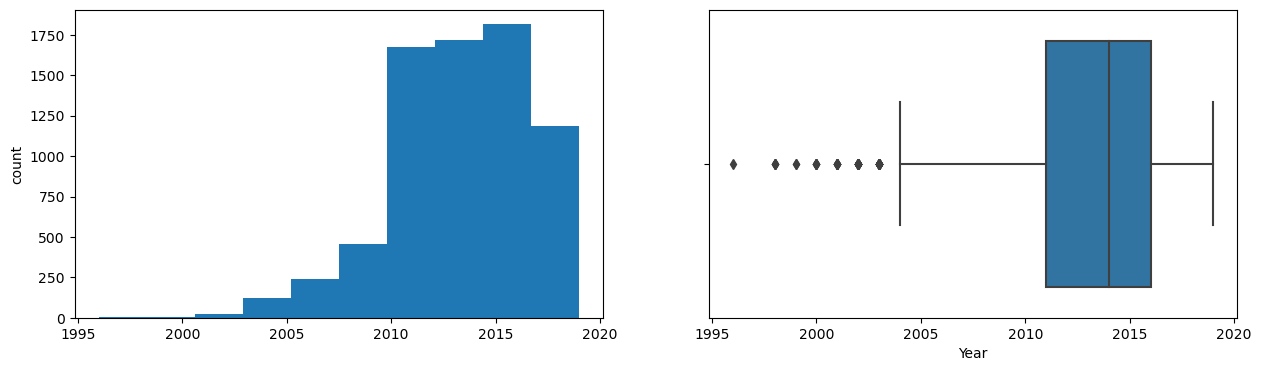

Kilometers_Driven
Skew : 61.58


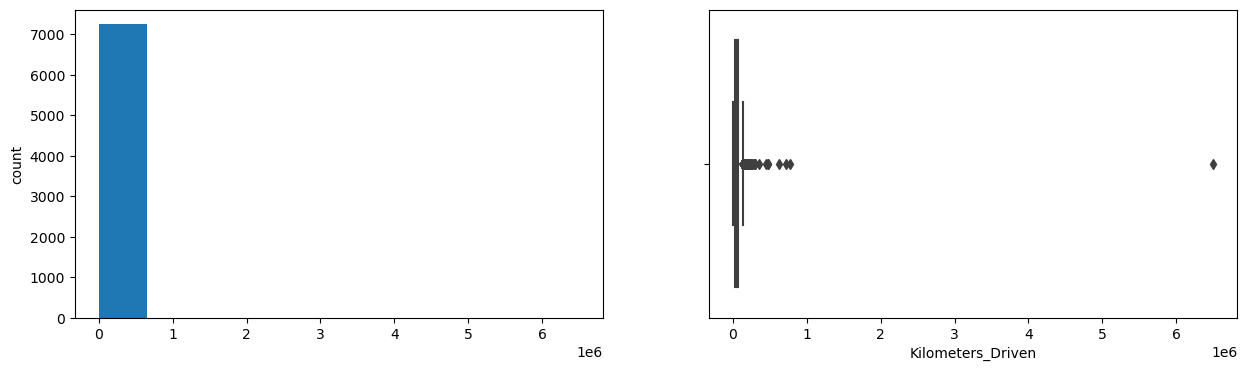

Mileage
Skew : 0.67


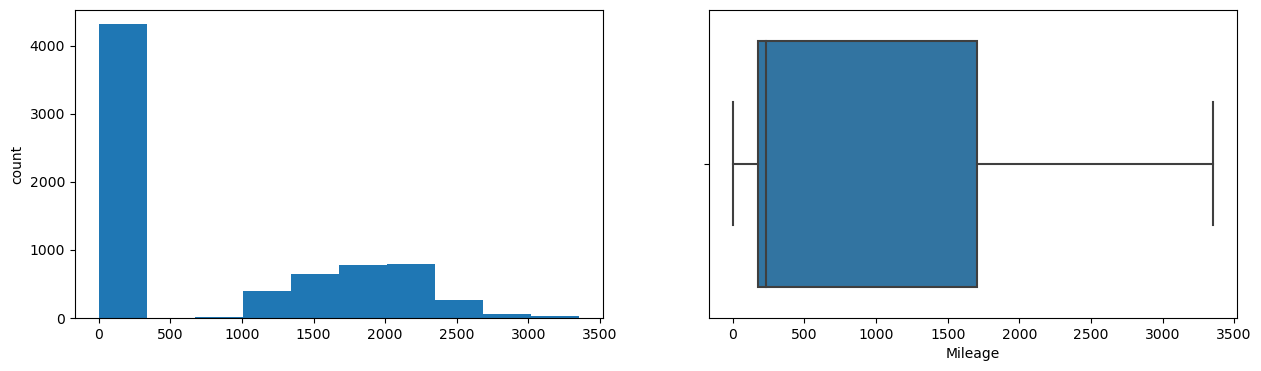

Engine
Skew : 1.41


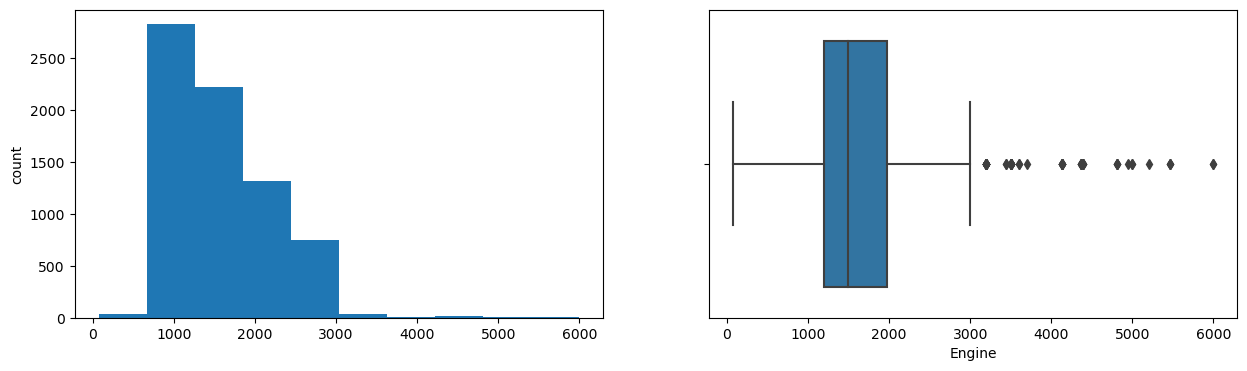

Power
Skew : 5.42


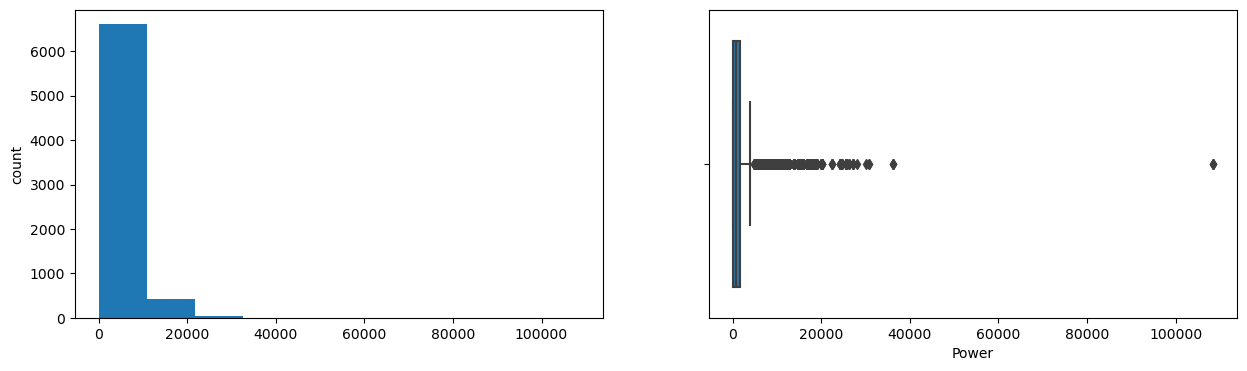

Seats
Skew : 1.9


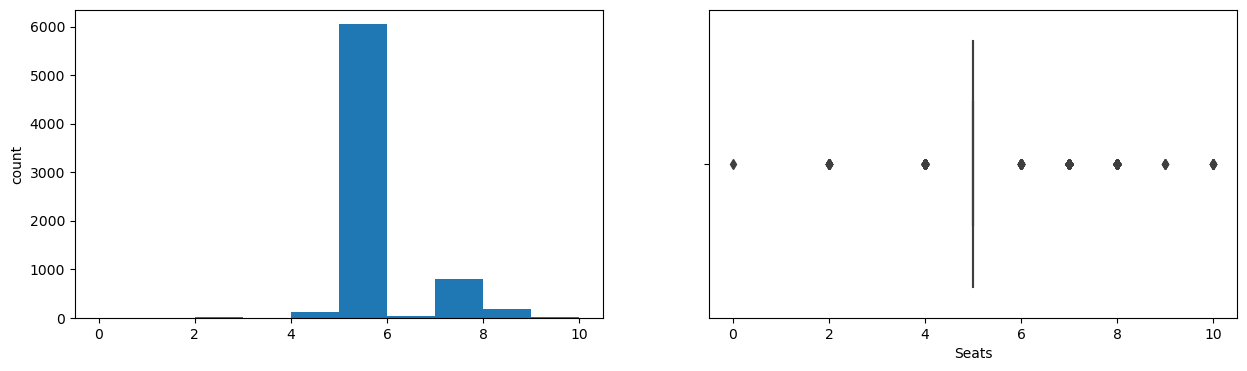

New_Price
Skew : 1.91


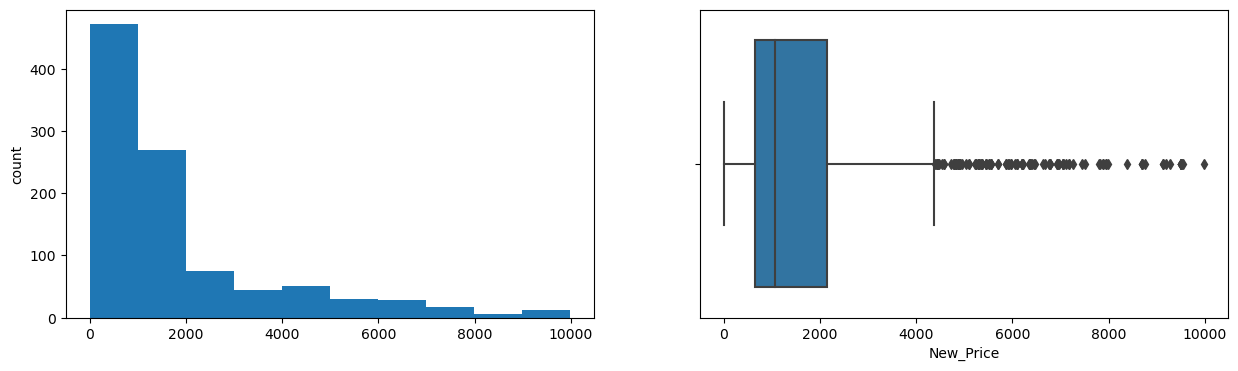

Price
Skew : 3.34


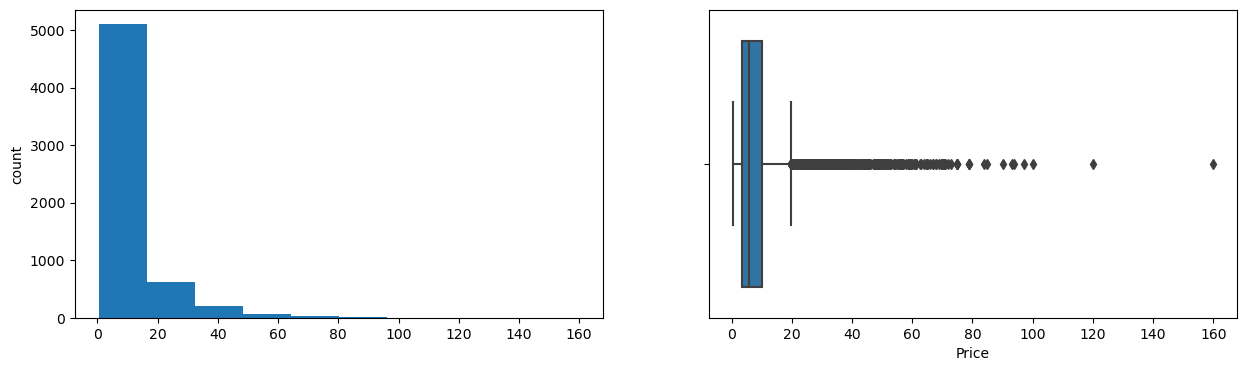

Car_Age
Skew : 0.84


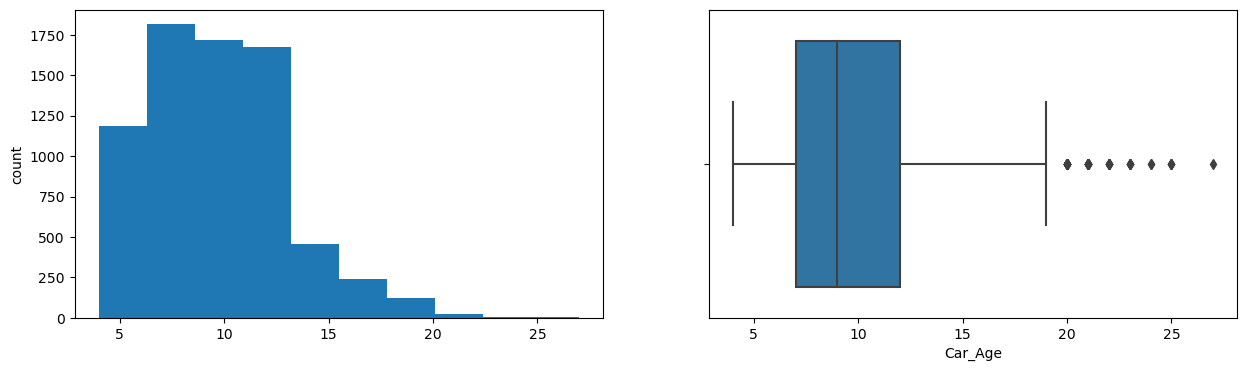

In [6]:
for col in num_cols: # using a for loop to plot every column mentioned in the numerical columns
    print(col)
    print('Skew :', round(data[col].skew(), 2)) # To find the skewness of the data. (show the picture)
    plt.figure(figsize = (15, 4)) # Size of the plots
    plt.subplot(1, 2, 1) # Position of the histogram plots
    data[col].hist(grid=False) # no grids
    plt.ylabel('count') # labelling the y axis
    plt.subplot(1, 2, 2) # Position of the box plots
    sns.boxplot(x=data[col]) # plotting boxplots
    plt.show()

# EDA Bivariate Analysis

##### Bivariate Analysis compares two features to find the trend between them.
Example is a pair plot as shown below

<Figure size 1300x1700 with 0 Axes>

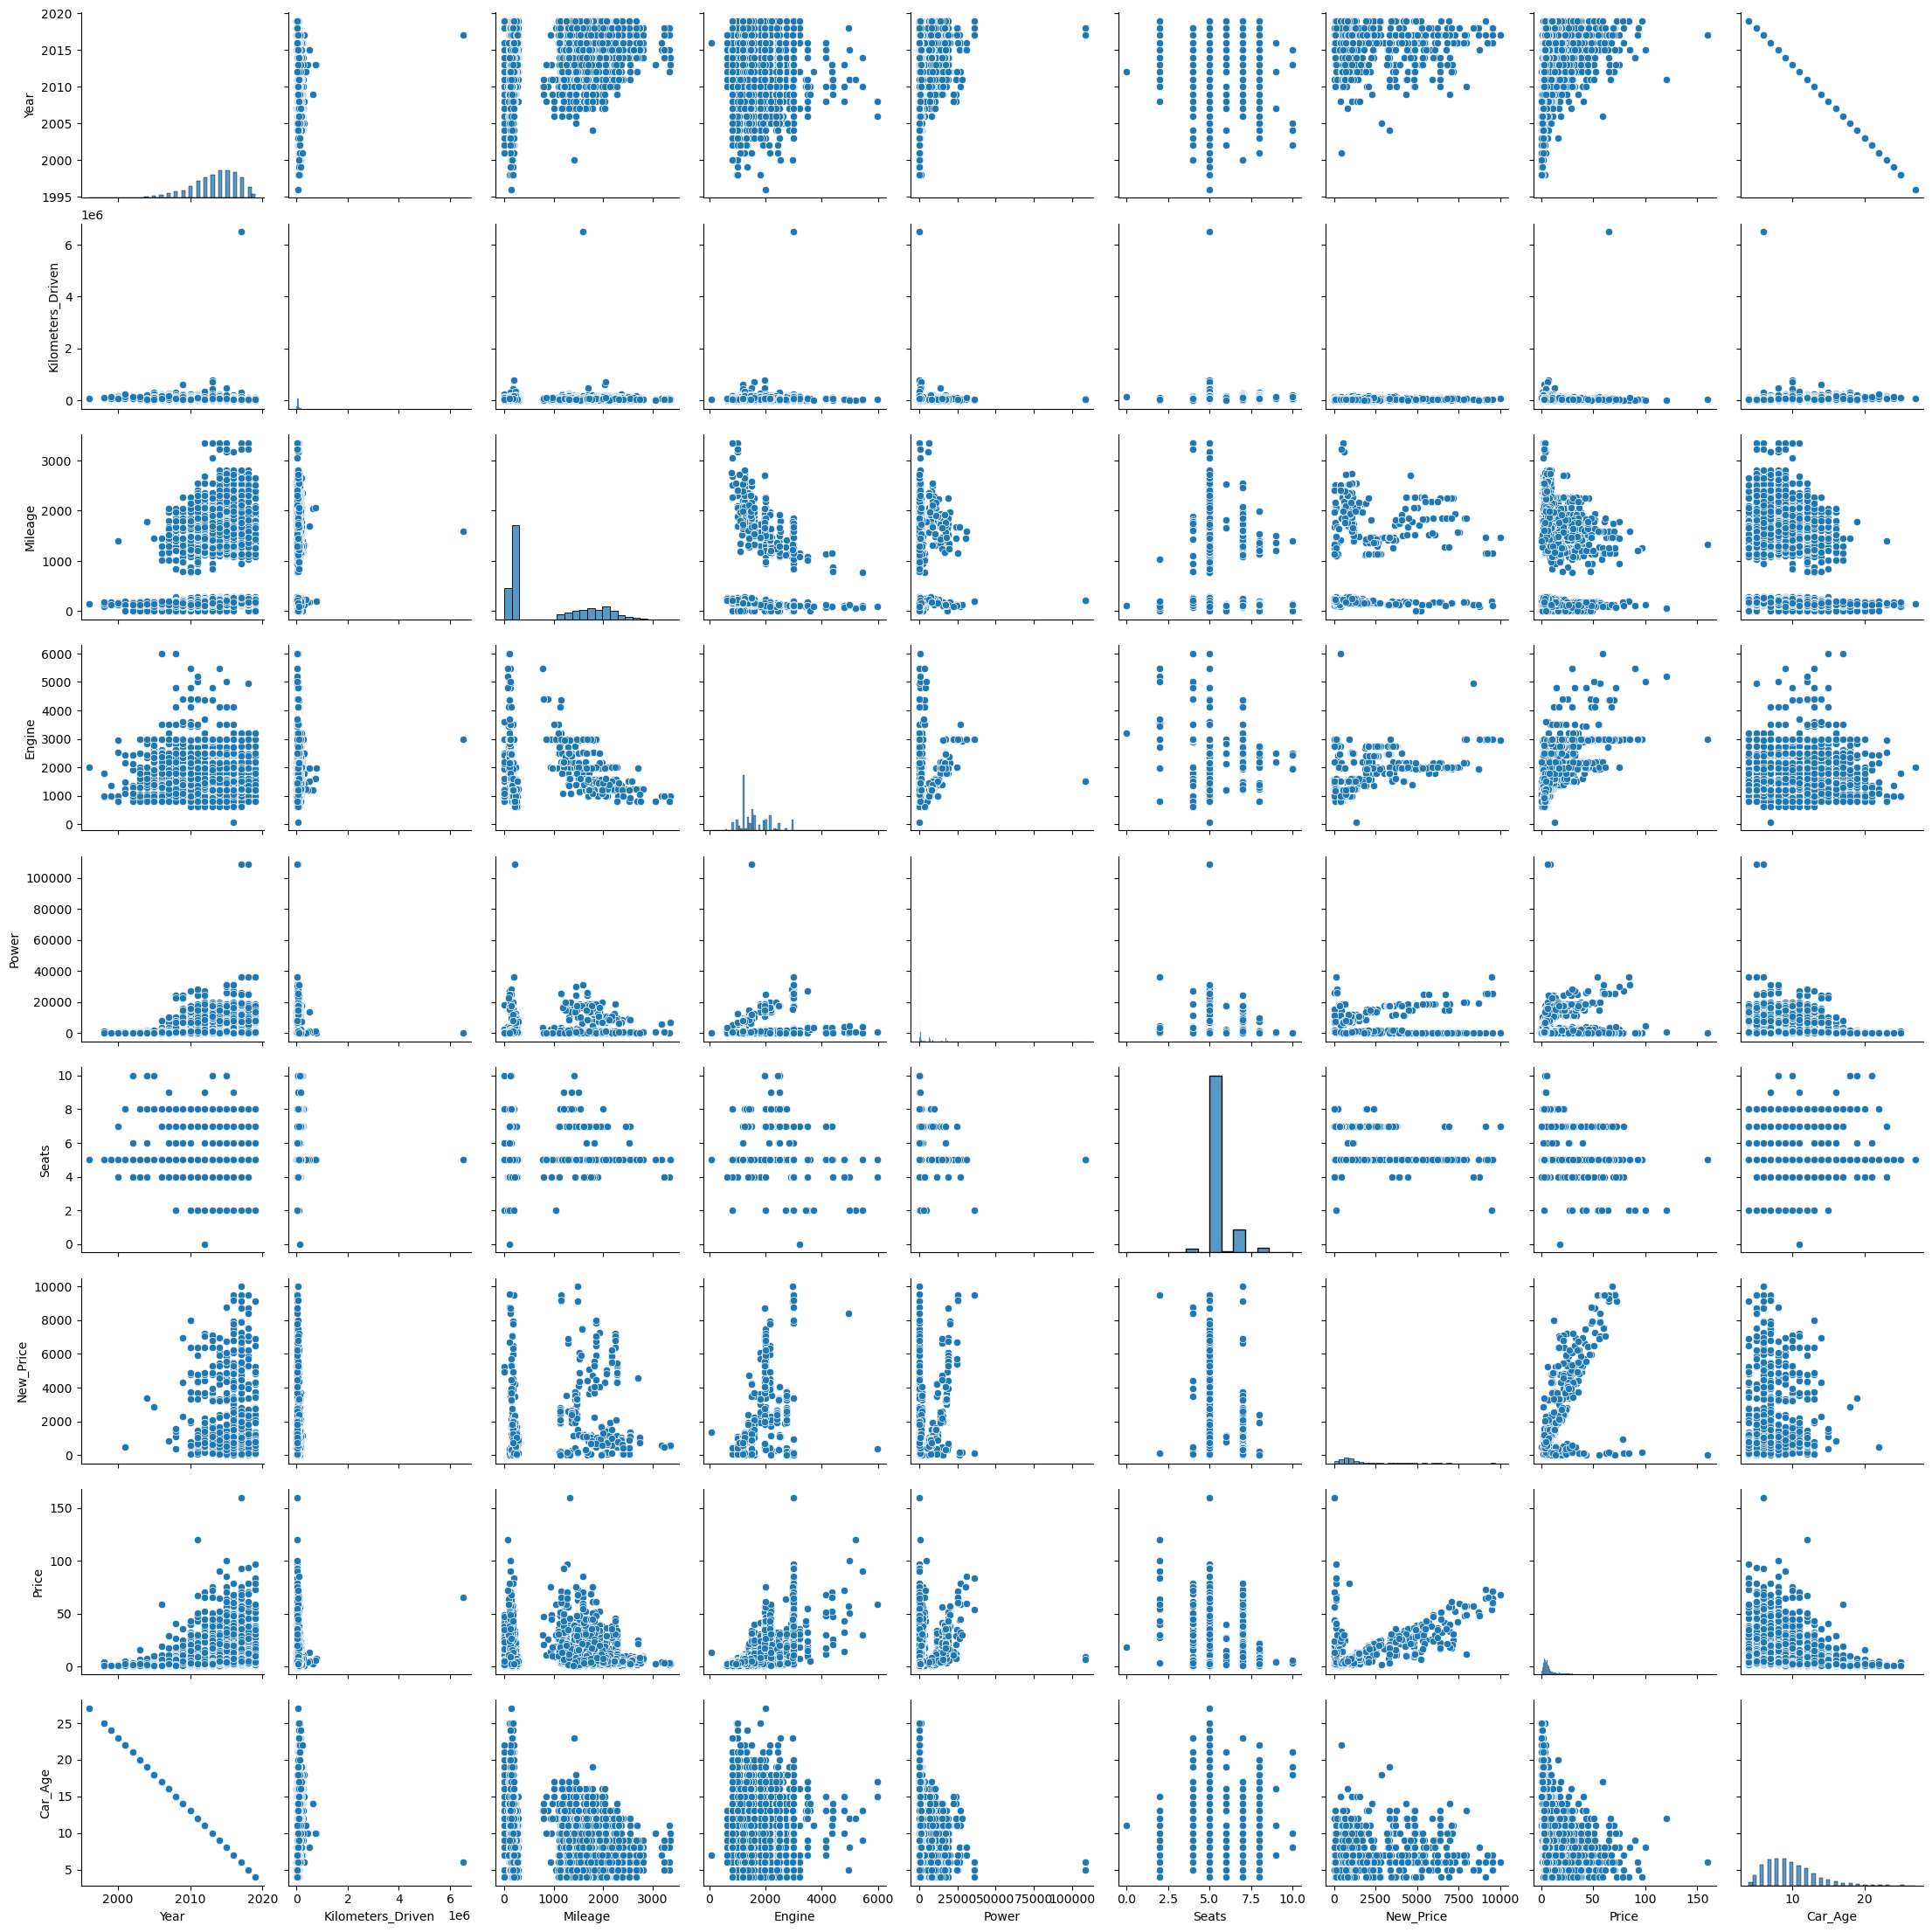

In [7]:
plt.figure(figsize=(13,17)) # figsize is optional. It is just the size of the plots
sns.pairplot(data)
plt.show()

# EDA Multivariate Analysis

##### Multivariate Analysis looks at more than 2 variables.

C:\Users\ubaid\AppData\Local\Temp\ipykernel_3840\2842646507.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1)


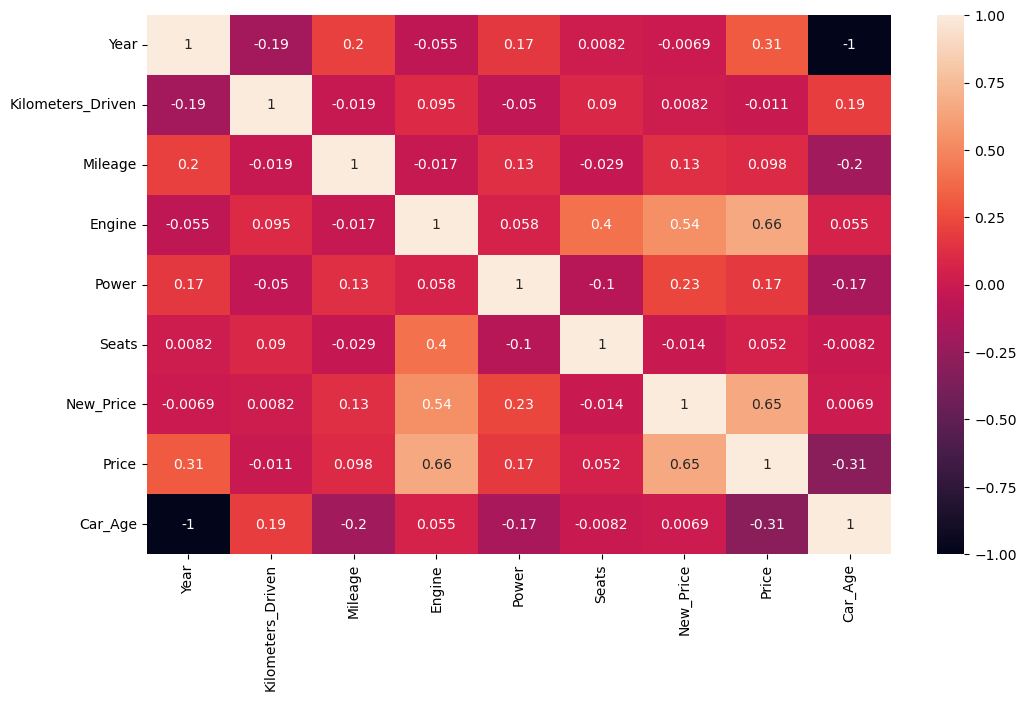

In [9]:
plt.figure(figsize=(12, 7)) # Size of the plot
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1) 

# data.corr() computes the pairwise correlation of the columns
# annot = True will show the numbers, corresponding to the strength and direction of corelation on each cell of the heatmap
# annot = False will just show colors on the cells, without any figures
# vmin and vmax are the minimum and maximum values the correlation can take

plt.show()